# Projecto SIM

## Nomes:
Lucas Silva   21703349

Pedro Santos  21702626

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
import seaborn
import sklearn
import math
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, matthews_corrcoef, f1_score


In [3]:
file_name = "https://raw.githubusercontent.com/tiago-santos-ulus/sim_2019/master/data/wine_q.csv"

data = pd.read_csv(file_name, sep = ",")

## Exercicio 3

No excerto seguinte, queriamos ter a certeza que estavamos a realizar corretamente a operação do drop_duplicates, assim criámos um elemento igual à segunda linha do data, e adicionámos à amostra, e depois procedemos à retirada dos duplicados.
Como podemos ver no final demos print do tamanho da amostra e inicialmente era 3961, depois de adicionarmos o novo elemento passou a 3962, e no fnal aseguir a termos utilizado a função drop_duplicates voltámos a ter 3961. Ou seja, a amostra inicial não tinha duplicados.

In [4]:
len1 = len(data)

In [5]:
data.loc[3961] = [data["fixed acidity"][1],
                  data["volatile acidity"][1],
                  data["citric acid"][1],
                  data["residual sugar"][1],
                  data["chlorides"][1],
                  data["free sulfur dioxide"][1],
                  data["total sulfur dioxide"][1],
                  data["density"][1],
                  data["pH"][1],
                  data["sulphates"][1],
                  data["alcohol"][1],
                  data["quality"][1]]

In [6]:
len2 = len(data)

In [7]:
data.drop_duplicates(subset = None ,inplace=True)

In [8]:
len3 = len(data)

In [9]:
print(len1,len2,len3)

3961 3962 3961


## Exercicio 4

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0.0
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1.0


In [11]:
data.columns[0]

'fixed acidity'

C:\Users\mitra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


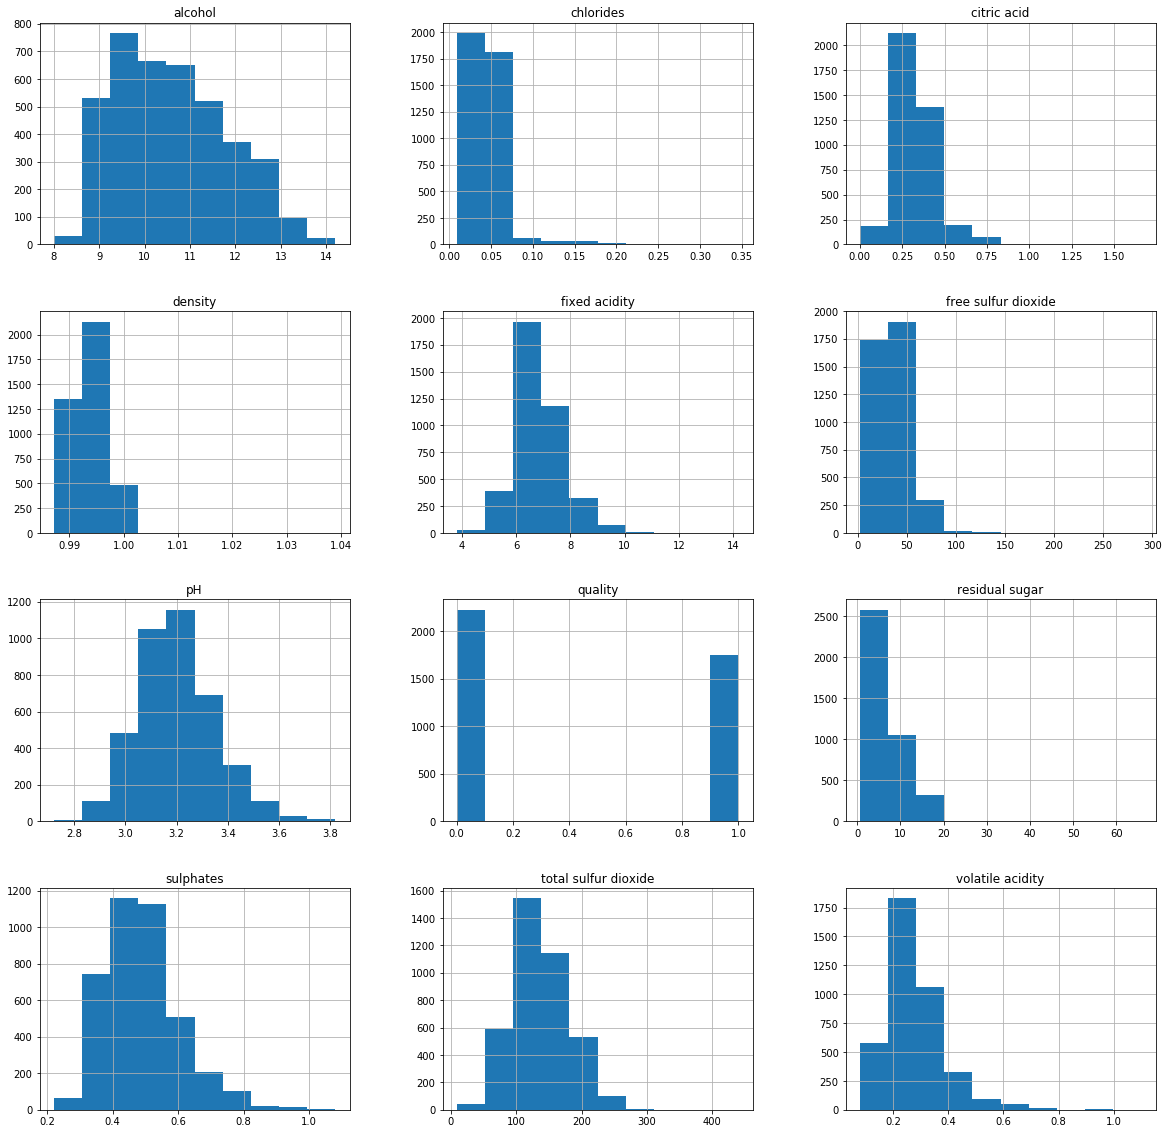

In [12]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

Após analisarmos os vários histogramas obtidos, e procurarmos por distribuições que não são normais. Algumas destas distribuições claramente não são normais, tais como, Chlorides, Free Sulfur Dioxide, Quality, Residual Sugar e Volatile Acidiity. Onde podemos verificar que não reproduzem a curva suposta.

## Exercicio 5

In [13]:
for col in data.columns:
    print( stats.jarque_bera(data[col]))

(1154.1959249402914, 0.0)
(6446.805928256506, 0.0)
(8842.606940336995, 0.0)
(6484.481707860443, 0.0)
(224093.90964878083, 0.0)
(31322.882464830083, 0.0)
(226.28045837594703, 0.0)
(34186.93200941494, 0.0)
(186.35909487220525, 0.0)
(982.6566465677099, 0.0)
(214.08677534188936, 0.0)
(660.7384825453336, 0.0)


Com os dados retornados e devidamente analisados, podemos ver que a função do jarque_bera retorna dois valores, o jb_value e o p_value, tal como aparecem antes, respectivamente. Ao analisarmos a coluna da esquerda (jb_value) vemos que os valores variam entre si, enquanto que os valores da coluna da direita (p_value) são todos iguais a 0.0, ou seja, nenhuma das distribuições passa ao teste de normalidade.

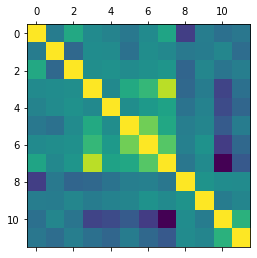

In [14]:
plt.matshow(data.corr())
plt.show()

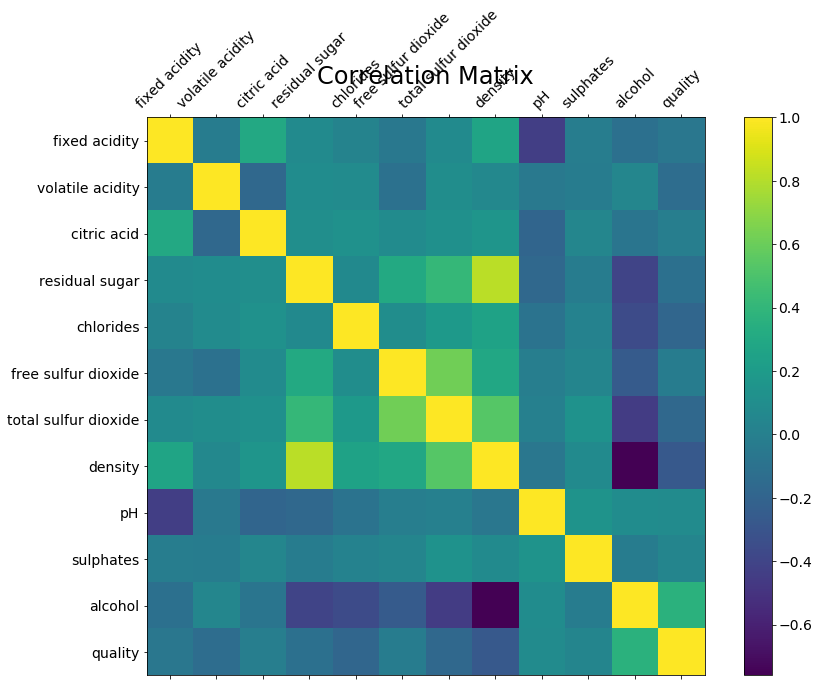

In [15]:
f = plt.figure(figsize=(14, 10))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=24);

In [16]:
data.head().style.background_gradient(cmap='coolwarm').set_precision(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,21,0.045,45,1.7e+02,1,3,0.45,8.8,0
1,6.3,0.3,0.34,1.6,0.049,14,1.3e+02,0.99,3.3,0.49,9.5,1
2,8.1,0.28,0.4,6.9,0.05,30,97,1,3.3,0.44,10,0
3,7.2,0.23,0.32,8.5,0.058,47,1.9e+02,1,3.2,0.4,9.9,0
4,6.2,0.32,0.16,7,0.045,30,1.4e+02,0.99,3.2,0.47,9.6,1


## Exercício 7

    Após analisarmos os dados obtidos no exercício 5, temos que os p_values das diversas colunas têm todos o mesmo valor, neste caso igual a 0.0, assim podemos concluir que a utilização do PCA é válida para todo o dataset presente, pois o valor é menor que o valor de significância.
    No exercício 6, depois de analisado o gráfico de correlação obtido chegamos à mesma conslusão do caso anterior, a única excepção neste caso é que há uma correlação maior entre a coluna do "residual sugar" e do "density", mesmo assim a utilização do PCA continua a ser válida, pois a redução de componentes não vai afetar a amostra em termos de percentagem de variância explicada.

## Exercício 8

    Neste exercício estamos a dividir o dataset em variáveis independentes, que são as onze primeiras do dataset, e na variável dependente que neste caso é o quality

## Independent Variables

In [17]:
X = data.iloc[:, :-1]
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36           20.70      0.045   
1               6.3             0.300         0.34            1.60      0.049   
2               8.1             0.280         0.40            6.90      0.050   
3               7.2             0.230         0.32            8.50      0.058   
4               6.2             0.320         0.16            7.00      0.045   
5               8.1             0.220         0.43            1.50      0.044   
6               8.1             0.270         0.41            1.45      0.033   
7               8.6             0.230         0.40            4.20      0.035   
8               7.9             0.180         0.37            1.20      0.040   
9               6.6             0.160         0.40            1.50      0.044   
10              8.3             0.420         0.62           19.25      0.040   
11              6.6         

## Dependent Variables

In [18]:
y = data.iloc[:, -1]
print(y)

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
5       1.0
6       0.0
7       0.0
8       0.0
9       1.0
10      0.0
11      1.0
12      1.0
13      1.0
14      1.0
15      0.0
16      1.0
17      1.0
18      0.0
19      0.0
20      1.0
21      1.0
22      1.0
23      0.0
24      1.0
25      1.0
26      1.0
27      1.0
28      0.0
29      0.0
       ... 
3931    0.0
3932    0.0
3933    0.0
3934    1.0
3935    1.0
3936    0.0
3937    0.0
3938    0.0
3939    1.0
3940    1.0
3941    0.0
3942    0.0
3943    0.0
3944    0.0
3945    0.0
3946    0.0
3947    0.0
3948    1.0
3949    1.0
3950    1.0
3951    0.0
3952    0.0
3953    0.0
3954    0.0
3955    0.0
3956    1.0
3957    0.0
3958    1.0
3959    1.0
3960    1.0
Name: quality, Length: 3961, dtype: float64


## Exercício 9

In [19]:
x = StandardScaler().fit_transform(X)

In [20]:
pca_non_norm = PCA(n_components=data.shape[1]-1)

pca_non_norm.fit(data.values[:,:-1])
pca_non_norm.explained_variance_ratio_

array([9.11750956e-01, 7.83995060e-02, 8.98677941e-03, 5.05652560e-04,
       3.32367851e-04, 8.52919079e-06, 6.68862191e-06, 5.31948437e-06,
       3.99910524e-06, 2.02028505e-07, 1.58419374e-10])

In [21]:
data_non_norm_pca_loadings = pd.DataFrame(pca_non_norm.components_.transpose(), index = data.columns[:-1], columns=[f"PC{i}" for i in range(1,data.shape[1]) ])

In [22]:
data_non_norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.001387,-0.009669,0.013551,-0.149874,0.984572,0.076450,-0.044696,-0.005322,-0.000149,0.002325,-0.000766
volatile acidity,0.000198,-0.001726,0.001775,0.014280,-0.004622,-0.120048,-0.380764,0.185129,0.897288,-0.031252,-0.000702
citric acid,0.000341,0.000094,0.001670,-0.005230,0.042405,-0.065391,0.868546,-0.261078,0.413005,-0.028072,-0.000374
residual sugar,0.045543,0.014519,0.996320,0.070800,-0.003291,0.005677,0.000184,0.000050,-0.002248,0.000636,-0.000375
chlorides,0.000098,-0.000066,0.000019,-0.006830,-0.001399,-0.017333,0.014002,0.003280,0.037838,0.998996,-0.004489
free sulfur dioxide,0.262402,0.964561,-0.025604,-0.005905,0.008459,0.000695,-0.001050,0.000707,0.001487,-0.000022,0.000007
total sulfur dioxide,0.963806,-0.263201,-0.040997,0.010868,-0.001671,-0.000689,0.000055,-0.000478,-0.000790,-0.000020,-0.000004
density,0.000035,-0.000020,0.000439,-0.001165,0.000318,0.003580,0.000234,0.000359,0.001462,0.004488,0.999982
pH,0.000020,-0.000203,-0.006407,0.016179,-0.075730,0.941864,-0.079889,-0.279182,0.149516,0.012704,-0.003483
sulphates,0.000333,-0.000612,-0.002061,0.002938,-0.003899,0.296645,0.303405,0.905303,-0.018458,-0.001371,-0.001419


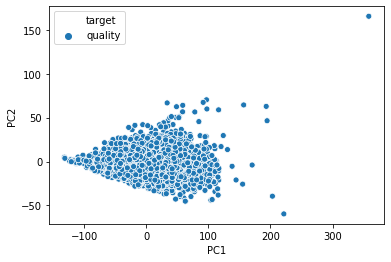

In [23]:
# this is the dataset rotated
data_non_norm_pca_scores = pca_non_norm.transform(data.values[:,:-1])

#constructing the dataframe
data_non_norm_pca_scores_df = pd.DataFrame(data_non_norm_pca_scores, columns = [f"PC{i}" for i in range(1,data.shape[1])])
data_non_norm_pca_scores_df["target"] = data.columns[-1]

#notice how the scatterplot of the non normalized data is
seaborn.scatterplot(data=data_non_norm_pca_scores_df, x="PC1", y="PC2", hue="target")

## Normalização dos dados
Agora vamos proceder à normalização dos dados, através do Scaler

In [24]:
scaler = StandardScaler()
data_mtrx_norml = scaler.fit_transform(data.values[:,:-1])

In [25]:
pca_norm = PCA(n_components=data.shape[1]-1)
pca_norm.fit(data_mtrx_norml)
pca_norm.explained_variance_ratio_

array([0.28941239, 0.14513327, 0.11027694, 0.09445886, 0.08919371,
       0.08448178, 0.06564064, 0.05473092, 0.03898492, 0.02553686,
       0.0021497 ])

In [26]:
data_norm_pca_loadings = pd.DataFrame(pca_norm.components_.transpose(), index = data.columns[:-1], columns=[f"PC{i}" for i in range(1,data.shape[1]) ])

In [27]:
data_norm_pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
fixed acidity,0.152835,-0.595986,-0.055466,0.003065,0.260053,0.002843,-0.211089,0.563920,0.370509,0.136228,-0.179780
volatile acidity,0.026771,0.063344,0.672198,0.168251,0.383853,0.433047,0.285174,0.108064,-0.179983,0.233361,-0.019625
citric acid,0.151911,-0.384032,-0.461453,0.142312,0.000857,0.120641,0.711136,-0.072173,-0.261001,0.050317,-0.010951
residual sugar,0.422095,0.024514,0.202225,-0.280083,0.159016,-0.263243,0.241202,-0.422158,0.358607,-0.072347,-0.486911
chlorides,0.211968,-0.029701,0.108585,0.669413,-0.487061,0.244592,-0.022996,-0.136997,0.417670,-0.052923,-0.026149
free sulfur dioxide,0.308153,0.260425,-0.309921,-0.337623,-0.099782,0.495466,-0.142814,-0.058128,0.125295,0.575552,0.031692
total sulfur dioxide,0.416806,0.225205,-0.123396,-0.093913,0.109857,0.376190,-0.055537,0.274100,-0.110490,-0.711630,-0.032872
density,0.512038,0.013104,0.128844,0.006199,0.085378,-0.349913,0.080040,0.050298,0.079800,0.074948,0.755219
pH,-0.114020,0.578270,-0.145005,0.134127,-0.003516,-0.257729,0.400874,0.526391,0.269723,0.123225,-0.146379
sulphates,0.047439,0.191317,-0.352815,0.497931,0.658631,-0.063262,-0.262524,-0.274051,-0.009803,0.070471,-0.043031


In [28]:
var_cumsum = np.cumsum(pca_norm.explained_variance_ratio_)
var_cumsum

array([0.28941239, 0.43454566, 0.5448226 , 0.63928146, 0.72847517,
       0.81295695, 0.87859759, 0.93332851, 0.97231343, 0.9978503 ,
       1.        ])

In [29]:
pca_norm.explained_variance_ratio_

array([0.28941239, 0.14513327, 0.11027694, 0.09445886, 0.08919371,
       0.08448178, 0.06564064, 0.05473092, 0.03898492, 0.02553686,
       0.0021497 ])

In [30]:
sum(pca_norm.explained_variance_ratio_)

1.0

Este output indica-nos os valores de explicação de variância de cada componente, de forma decrescente

## Variância
Nesta secção selecionamos a percentagem de variância que queremos no mínimo explicada

In [31]:
np.argwhere(var_cumsum > 0.90)[0]

array([7], dtype=int64)

Para um dataset com 12 colunas uma redução para 8 colunas e apenas explicar 90% da variância, não vale a pena utlizar o PCA neste caso pois a redução não é vantajosa para este dataset

In [32]:
pca_pc8 = PCA(n_components=8)
data_norm_pca_data = pca_pc8.fit_transform(data_mtrx_norml)

In [33]:
data_norm_pca_scored_df = pd.DataFrame(data_norm_pca_data, columns=[f"PC{i}" for i in range(1,data_norm_pca_data.shape[1]+1) ])

In [34]:
data_norm_pca_scored_df["target"] = data["quality"]
data_norm_pca_scored_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,target
0,3.862702,-0.511138,0.906204,-1.189948,0.160987,-1.203505,0.134813,-1.207956,0.0
1,-0.511673,0.436496,0.345879,1.057328,-0.404488,-0.764931,0.263452,0.594880,1.0
2,0.284474,-1.171489,0.115821,0.240730,-0.104588,-0.794319,0.443306,0.875711,0.0
3,1.585098,0.062778,-0.080411,-0.529644,-0.804770,0.210587,-0.240052,0.499705,0.0
4,0.215305,0.886144,1.277464,-0.077055,-0.249904,-0.566766,-0.796586,-0.185385,1.0


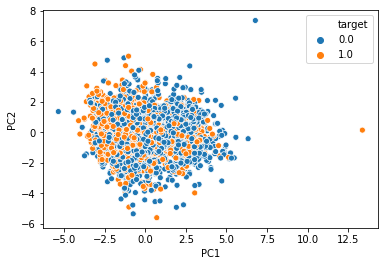

In [35]:
seaborn.scatterplot(data=data_norm_pca_scored_df, x="PC1", y="PC2", hue="target")

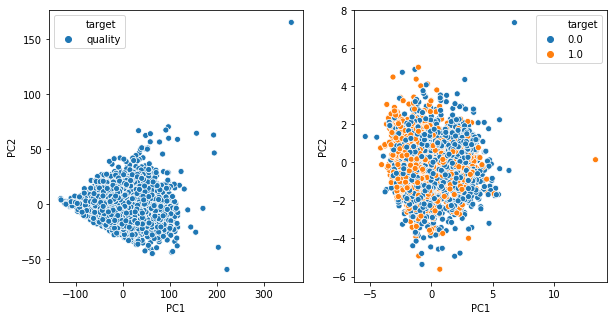

In [36]:
plt.rcParams['figure.figsize'] = [10, 5]
f, axes = plt.subplots(1, 2)
seaborn.scatterplot(data=data_non_norm_pca_scores_df, x="PC1", y="PC2", hue="target", ax=axes[0])
seaborn.scatterplot(data=data_norm_pca_scored_df, x="PC1", y="PC2", hue="target", ax=axes[1])

C:\Users\mitra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mitra\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


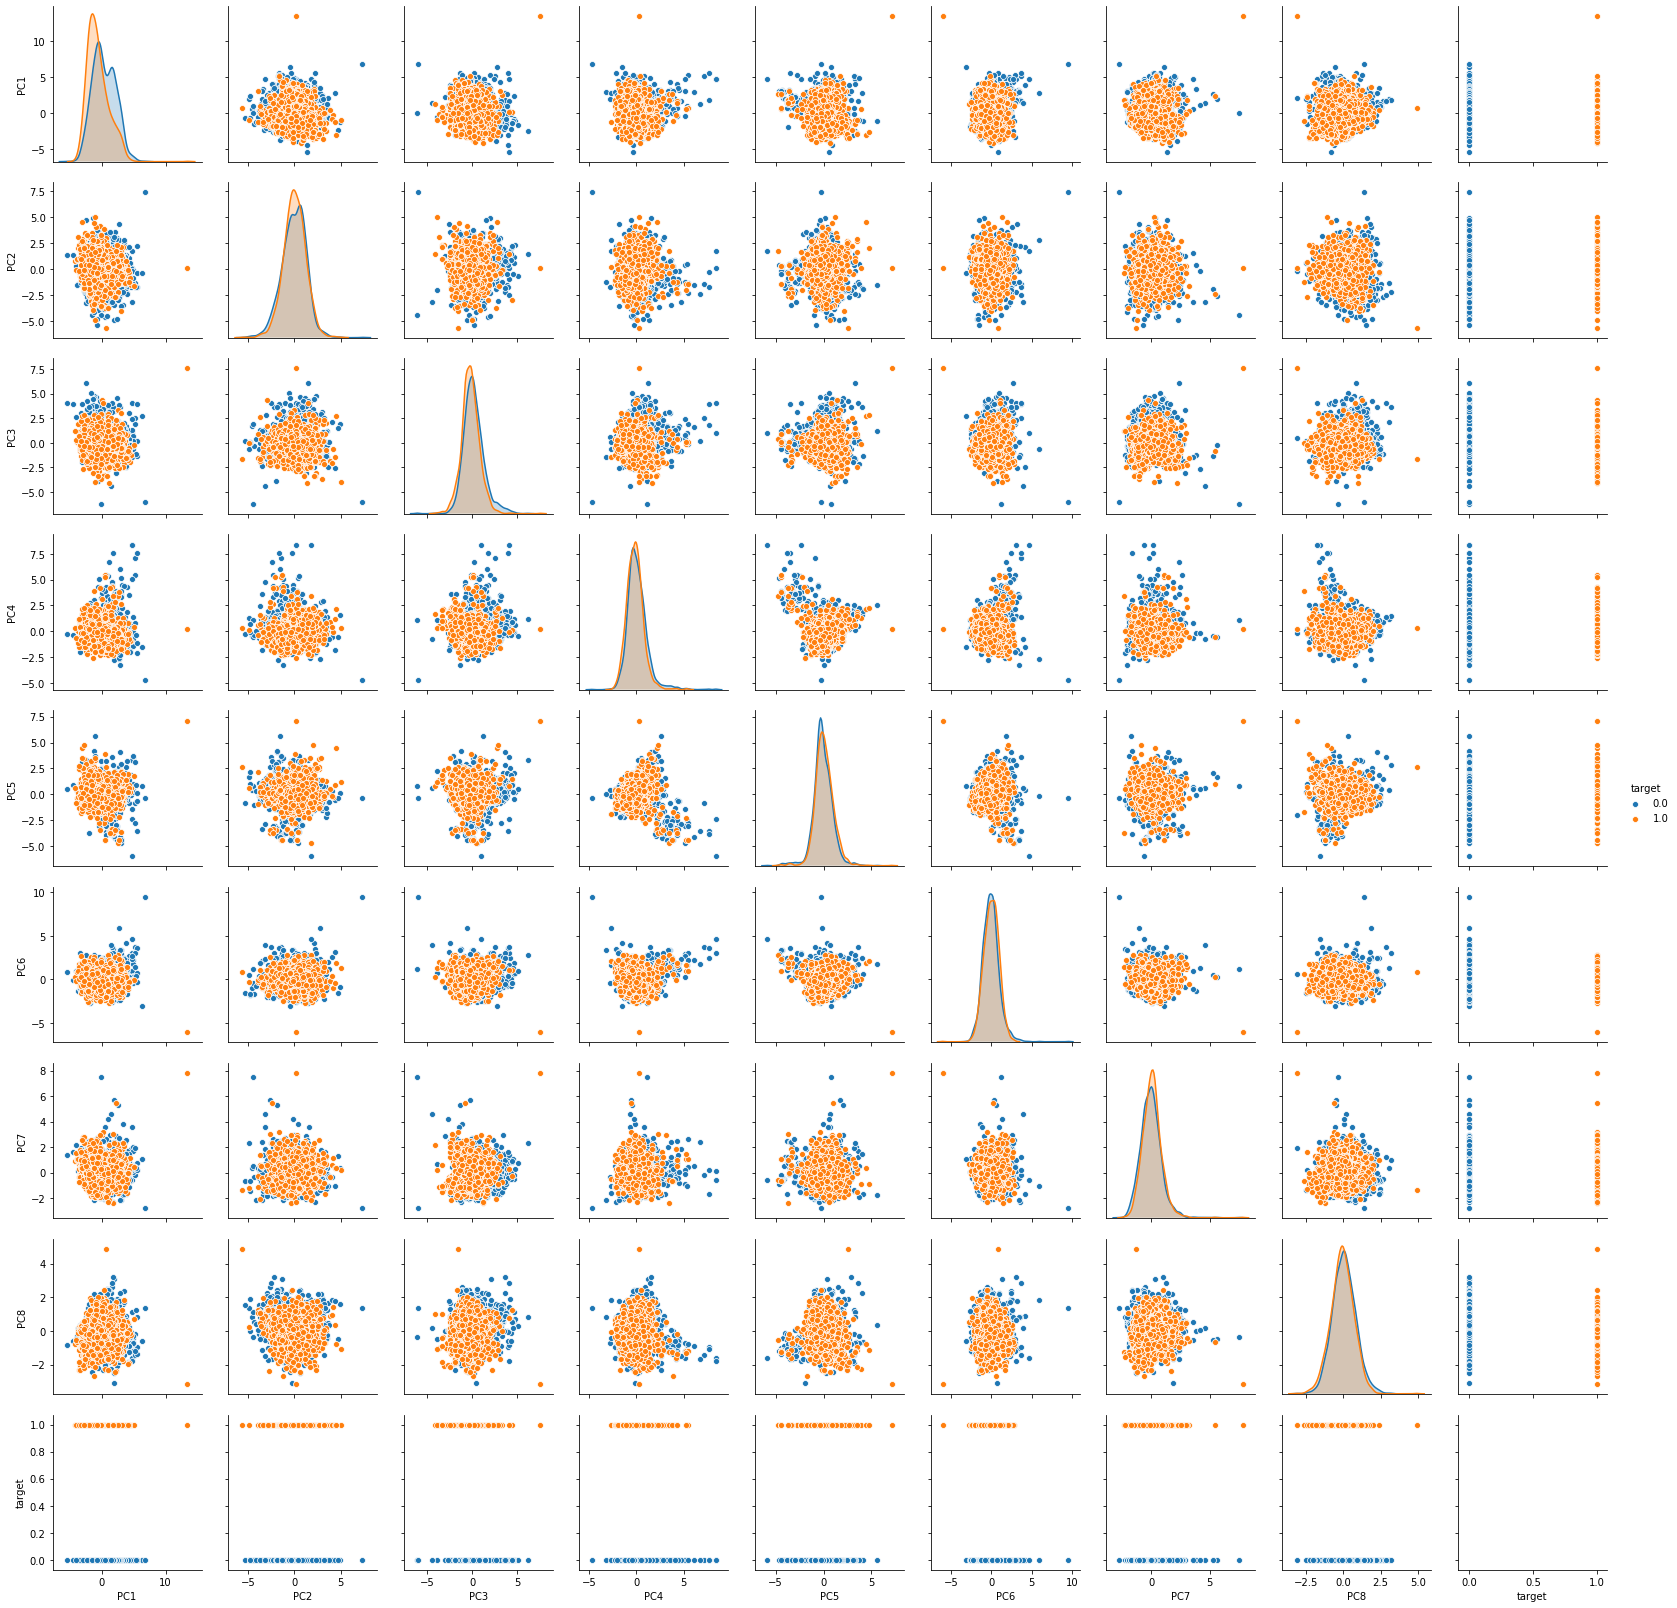

In [37]:
data_norm_pca_scored_df["target"] = data_norm_pca_scored_df["target"].astype('category')
seaborn.pairplot(data_norm_pca_scored_df, hue="target")

## Exercício 10

In [38]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size= 0.25)
regressor = LinearRegression()

regressor.fit(X_train, y_train)


print(regressor.coef_)
print(regressor.intercept_)


[ 4.70438684e-02 -5.25286929e-01  4.74155984e-02  2.27827314e-02
 -3.57871725e-01  2.26494878e-03 -3.13897516e-04 -4.49712811e+01
  4.21101233e-01  3.09015194e-01  1.09871362e-01]
42.12193286896556


Dividimos o dataset em duas amostras uma para treino, e outra para teste. 
Amostra de treino tem 2970 linhas de dimensão, ou seja, 75% do dataset.
E a amostra de teste tem 991 linhas de dimensão, ou seja, 25% do dataset.

In [39]:
clf = LogisticRegression(random_state = 1, solver = 'lbfgs')
model = clf.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

[-1.92312309]
[[-2.11290713e-01 -3.32761062e+00  3.47676743e-01  1.38313176e-02
  -5.22981184e-01  9.75831335e-03 -2.15297807e-03 -1.81984753e+00
  -7.46575957e-01  1.47038588e+00  6.85859373e-01]]


C:\Users\mitra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [40]:
print(X_train.shape)
print(X_test.shape)

(2970, 11)
(991, 11)


# Parte II

## Exercício 1 (Segunda Parte)

In [41]:
# Load libraries
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## Loading Digits DataSet

In [42]:
# Load the digits dataset
digits = datasets.load_digits()

# Create the features matrix
X = digits.data

# Create the target vector
y = digits.target

## Creating Pipeline

In [43]:
# Create standardizer
standardizer = StandardScaler()

# Create logistic regression
logit = LogisticRegression()

# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

## Create k-Fold Cross-Validation

In [44]:
# Create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

## Conduct k-Fold Cross-Validation

In [45]:
# Do k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             X, # Feature matrix
                             y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

## Calculate Mean Performance Score

In [46]:
# Calculate mean
cv_results.mean()

0.964931719428926

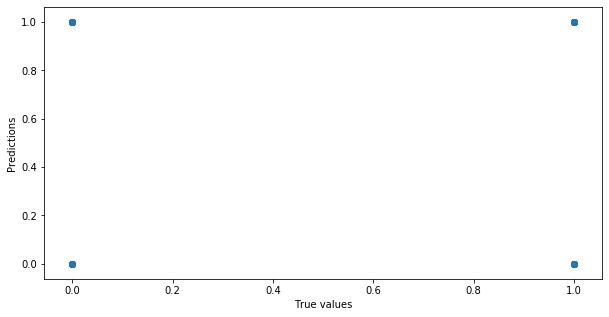

In [47]:
predictions=model.predict(X_train)
plt.scatter(y_train,predictions)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.show()

In [48]:
predictions.shape

(2970,)

In [49]:
zeros = 0
ones = 0

In [50]:
length = len(predictions)
for i in range(length):
    if predictions[i] == 0:
        zeros = zeros + 1
    else:
        ones = ones +1

In [51]:
print(zeros)
print(ones)

1861
1109


In [52]:
predictions.mean()

0.3734006734006734

## Exercício 2 (Segunda Parte)

## Accuracy

In [53]:
def accuracy(df):
    return (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'N']) / (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'N'] + df.loc['Alert', 'N'] + df.loc['Non-Alert', 'P'])

## Precision

In [54]:
def precision(df):
    return df.loc['Alert', 'P'] / (df.loc['Alert', 'P'] + df.loc['Alert', 'N'])

## Recall

In [55]:
def recall(df):
    return df.loc['Alert', 'P'] / (df.loc['Non-Alert', 'P'] + df.loc['Alert', 'P'])

## MCC - Mathew Correlation Coefficent

In [56]:
def mcc(df):
    return ((df.loc['Alert', 'P'] * df.loc['Non-Alert', 'N']) - (df.loc['Alert', 'N'] * df.loc['Non-Alert', 'P'])) / math.sqrt((df.loc['Alert', 'P'] + df.loc['Alert', 'N']) * (df.loc['Alert', 'P'] + df.loc['Non-Alert', 'P']) * (df.loc['Non-Alert', 'N'] + df.loc['Alert', 'N']) * (df.loc['Non-Alert', 'N'] + df.loc['Non-Alert', 'P']))    

## F1_Score

In [57]:
def f1(df):
    return ((2 * precision(df) * recall(df)) / precision(df) + recall(df))

## Report

In [58]:
def report(cm):
    return pd.DataFrame({
        "accuracy" : [accuracy(cm)],
        "precision" : [precision(cm)],
        "recall" : [recall(cm)],
        "mcc" : [mcc(cm)],
        "f1_score" : [f1(cm)]
    })

In [59]:
logmodel = LogisticRegression()
print(logmodel.fit(X_test, y_test))
y_pred = logmodel.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


C:\Users\mitra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [60]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),index=["Alert","Non-Alert"], columns =["P","N"])
cm

,P,N
Alert,397,138
Non-Alert,187,269


## Precision & Recall

In [61]:
report_df = report(cm)
report_df[["precision","recall"]]

,precision,recall
0,0.742056,0.679795


## Exercício 3
## F1_Score & MCC

In [62]:
report_df[["f1_score","mcc"]]

,f1_score,mcc
0,2.039384,0.33632


In [63]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71       535
         1.0       0.66      0.59      0.62       456

    accuracy                           0.67       991
   macro avg       0.67      0.67      0.67       991
weighted avg       0.67      0.67      0.67       991

